# 𝐸𝓂𝒶𝒾𝓁 𝒮𝓅𝒶𝓂 𝒟𝑒𝓉𝑒𝒸𝓉𝒾𝑜𝓃 𝓌𝒾𝓉𝒽 𝑀𝒶𝒸𝒽𝒾𝓃𝑒 𝐿𝑒𝒶𝓇𝓃𝒾𝓃𝑔

<!DOCTYPE html>
<html>

<head>
</head>

<body>
  <h2>Topic: Email Spam Detection with Machine Learning</h2>

  <h3>Objective:</h3>
  <p>
    The primary objective of this project is to develop a robust email spam detection system using machine learning
    techniques. Specifically, the project aims to leverage the Python programming language to create an efficient email
    spam detector and employ machine learning algorithms to train the detector for accurate classification of emails into
    spam and non-spam categories.
  </p>

  <h3>Description:</h3>

  <h4>1. Introduction:</h4>
  <ul>
    <li>Highlight the prevalence of spam emails and their potential threats, emphasizing the need for effective spam
      detection mechanisms.</li>
    <li>Introduce the project's goal: developing an email spam detector using Python and machine learning.</li>
  </ul>

  <h4>2. Background:</h4>
  <ul>
    <li>Provide background information on spam emails, detailing common characteristics such as cryptic messages, scams,
      and phishing content.</li>
    <li>Discuss the challenges associated with traditional spam filters and the potential of machine learning in enhancing
      detection accuracy.</li>
  </ul>

  <h4>3. Methodology:</h4>
  <ul>
    <li>Utilize Python programming language for implementation, taking advantage of its versatility and extensive
      libraries for machine learning.<models
    -li>Employ machine learning model like: KN, SVM...</li>
  </ul>
</body>
</html>
Future Enhancements, References, and Acknowledgments -->

</body>

</html>
, Future Enhancements, References, and Acknowledgments -->

</body>

</html>


<!DOCTYPE html>
<html>
<head>
  <style>
    body {
      font-family: "Helvetica", sans-serif;
      color: #333;
      max-width: 800px;
      margin: auto;
      line-height: 1.6;
    }
    h2 {
      color: #336699;
    }
    h3 {
      color: #336699;
    }
    h4 {
      color: #336699;
    }
    ul {
      list-style-type: none;
      padding: 0;
    }
    li {
      margin-bottom: 10px;
    }
  </style>
</head>
<body>
  <h2>Email Spam Detection Script - Python</h2>
  <h3>Overview:</h3>
  <ul>
    <li>Python script for email spam detection using machine learning techniques.</li>
    <li>Utilizes libraries such as pandas, numpy, seaborn, matplotlib, nltk, and sklearn.</li>
  </ul>
  <h3>Key Steps:</h3>
  <ol>
    <li>Ignore Python script warnings to ensure smooth execution.</li>
    <li>Import necessary libraries for data manipulation, analysis, and machine learning.</li>
    <li>Read the email spam dataset using pandas from a CSV file.</li>
  </ol>
  <h3>Note:</h3>
  <p>This script assumes the existence of a CSV file named 'EmailSpam.csv' in te specified file path.</p>
</body>
</html>


In [1]:
# Ignore Python Script warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
import string
from string import punctuation
from random import shuffle
import multiprocessing 
import email

In [4]:
import sklearn as sk
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

In [5]:
import os
rawdf = pd.read_csv(r'D:\GitHUb\OIBSIP\Data_Science\DataSheet\EmailSpam.csv', encoding='latin1')
df_head = rawdf.head(5)
# Apply a style to format the display
styled_df = df_head.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightgrey')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
])
styled_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


In [6]:
# Just trying something new
from IPython.display import display, Markdown, HTML
shape_text = f"The DataFrame has: {rawdf.shape[0]} rows and {rawdf.shape[1]} columns."
# Style the text with HTML and CSS
styled_shape_text = f"<div style='background-color: #D6EAF8; padding: 10px; border-radius: 15px;'>{shape_text}</div>"
display(HTML(styled_shape_text))

In [7]:
mails = rawdf[['v1','v2']]
mails.columns = ['label','email']
mails.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
mails.loc[1]['email']

'Ok lar... Joking wif u oni...'

In [9]:
print(f"\n{'-'*45}\nshape of data: {mails.shape}\n{'-'*45}\nno dimensions of data: {mails.ndim}\n{'-'*45}\nsize of data: {mails.size}\n{'-'*45}\nSum fo all null values:\n{mails.isnull().sum()}\n{'-'*45}")


---------------------------------------------
shape of data: (5572, 2)
---------------------------------------------
no dimensions of data: 2
---------------------------------------------
size of data: 11144
---------------------------------------------
Sum fo all null values:
label    0
email    0
dtype: int64
---------------------------------------------


In [10]:
mails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
mails['length'] = mails.email.str.len()
mails_head = mails.head(5)
# Apply a style to format the display
styled3_df = mails_head.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightgrey')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
])
styled3_df

,label,email,length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

<!DOCTYPE html>
<html>

<head>
</head>
<body>
  <h2>Text Processing Class</h2>
  <h3>Class Overview:</h3>
  <p>A Python class for text processing, providing methods for cleaning, tokenizing, removing stopwords, stemming, and lemmatizing text data in a given DataFrame.</p>

  <h3>Class Methods:</h3>
  <ul>
    <li><strong>remove_punctuation:</strong> Removes punctuation from the text.</li>
    <li><strong>tokenize:</strong> Splits the text into tokens.</li>
    <li><strong>remove_stopwords:</strong> Removes stopwords from the tokens.</li>
    <li><strong>stemming:</strong> Applies stemming to the tokens using Porter Stemmer.</li>
    <li><strong>lemmatizer:</strong> Applies lemmatization to the tokens using WordNet Lemmatizer.</li>
    <li><strong>process_text:</strong> Processes the text in the DataFrame, creating new columns for cleaned, tokenized, stopwords removed, stemmed, and lemmatized text.</li>
  </ul>
  <h3>Example Usage:</h3>
  <pre>
    <code>
      mails_processor = TextProcessing(mails)
      mails_processor.process_text()
    </code>
  </pre>
  <h3>Notes:</h3>
  <ul>
    <li>This class assumes the existence of a DataFrame named 'mails' with a column named 'email' containing text data.</li>
    <li>NLTK library is used for stopwords, Porter Stemmer, and WordNet Lemmatizer./li>
  </ul>
</body>
</html>


In [13]:
class TextProcessing:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.stopwords = nltk.corpus.stopwords.words("english")
        self.ps = nltk.PorterStemmer()
        self.wn = nltk.WordNetLemmatizer()

    def remove_punctuation(self, text):
        return "".join([char for char in text if char not in string.punctuation])

    def tokenize(self, text):
        return re.split("\W+", text)

    def remove_stopwords(self, token):
        return [word for word in token if word not in self.stopwords]

    def stemming(self, t_text):
        return [self.ps.stem(word) for word in t_text]

    def lemmatizer(self, t_text):
        return [self.wn.lemmatize(word) for word in t_text]

    def process_text(self):
        self.dataframe["body_text_clean"] = self.dataframe["email"].apply(self.remove_punctuation)
        self.dataframe["body_text_tokenized"] = self.dataframe["body_text_clean"].apply(self.tokenize)
        self.dataframe["body_text_nonstop"] = self.dataframe["body_text_tokenized"].apply(self.remove_stopwords)
        self.dataframe["body_text_stemmed"] = self.dataframe["body_text_nonstop"].apply(self.stemming)
        self.dataframe["body_text_lemmatized"] = self.dataframe["body_text_stemmed"].apply(self.lemmatizer)

mails_processor = TextProcessing(mails)
mails_processor.process_text()

In [14]:
mails['body_text_length'] = mails.email.str.len()
mails['body_text_clean_length'] = mails.body_text_clean.str.len()
mails.head()

,label,email,length,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized,body_text_length,body_text_clean_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre...",111,102
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]",29,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,149
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",49,43
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[nah, i, dont, think, goe, usf, live, around, ...",61,59


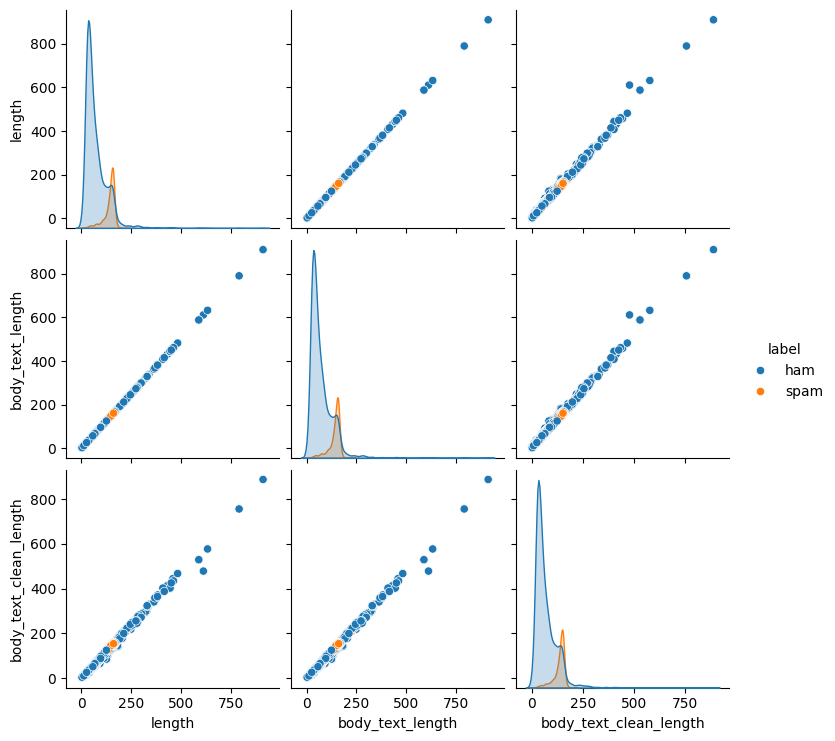

In [15]:
sns.pairplot(mails, hue='label') # Pair-plot

In [16]:
#Total length removal
print("Original Length:",mails['body_text_length'].sum())
print("Cleaned Length:",mails['body_text_clean_length'].sum())
print("Total Words Removed:",(mails['body_text_length'].sum()) - (mails['body_text_clean_length'].sum()))

Original Length: 446422
Cleaned Length: 422976
Total Words Removed: 23446


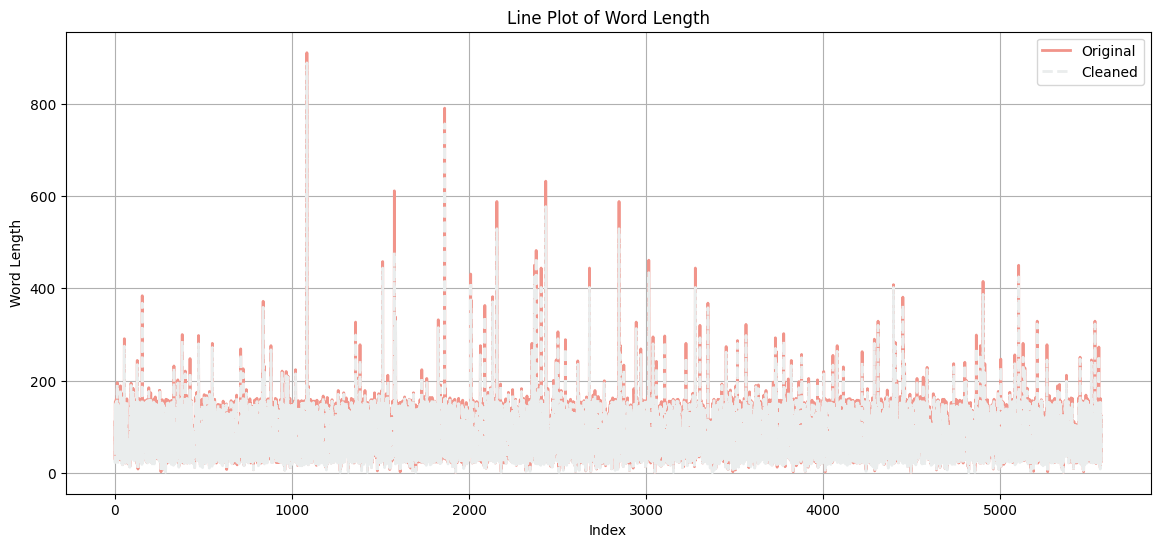

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(mails['body_text_length'], color='#F1948A', linewidth=2, label='Original')
plt.plot(mails['body_text_clean_length'], color='#EAEDED', linestyle='dashed', linewidth=2, label='Cleaned')
plt.xlabel("Index")
plt.ylabel("Word Length")
plt.title("Line Plot of Word Length")
plt.legend()
plt.grid(True)
plt.show()

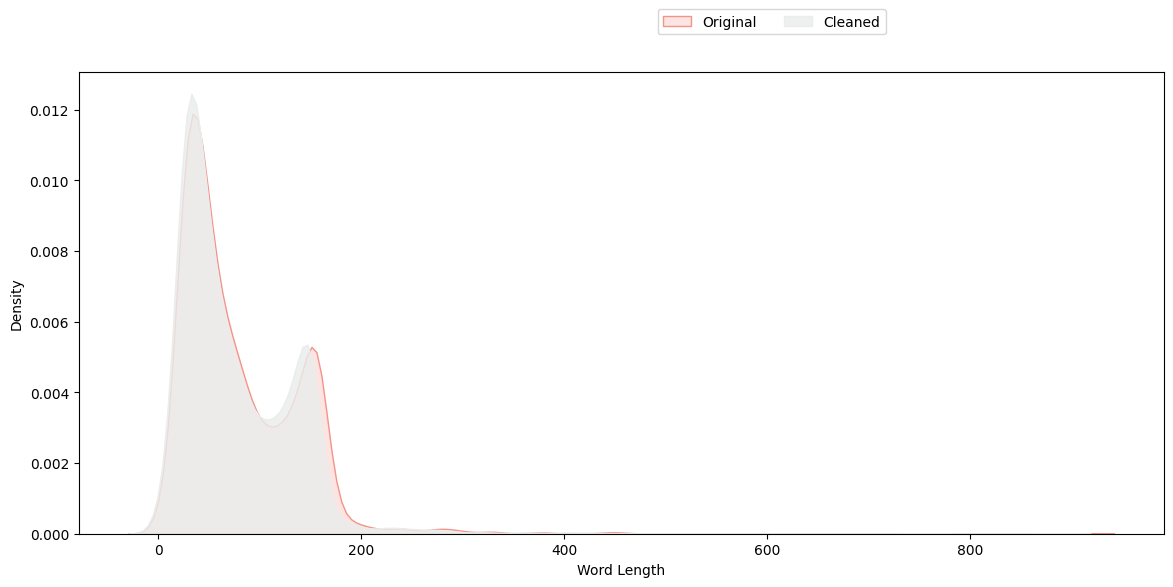

In [18]:
plt.figure(figsize=(14, 6))

sns.kdeplot(mails['body_text_length'], color='#F1948A', label='Original', fill=True)
sns.kdeplot(mails['body_text_clean_length'], color='#EAEDED', label='Cleaned', fill=True, alpha=0.8)

plt.xlabel("Word Length")
plt.legend(['Original', 'Cleaned'], bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.show()

In [19]:
mails_ = mails
mails_['num_characters'] = mails['email'].apply(len)
# num of words
mails_['num_words'] = mails['email'].apply(lambda x:len(nltk.word_tokenize(x)))
mails_['num_sentences'] = mails['email'].apply(lambda x:len(nltk.sent_tokenize(x)))
mails_.head()

,label,email,length,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized,body_text_length,body_text_clean_length,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre...",111,102,111,24,2
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]",29,23,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,149,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",49,43,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[nah, i, dont, think, goe, usf, live, around, ...",61,59,61,15,1


In [20]:
mails_.describe()

,length,body_text_length,body_text_clean_length,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,80.118808,80.118808,75.910983,80.118808,18.699390,1.996411
std,59.690841,59.690841,56.852396,59.690841,13.741932,1.520159
min,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000
25%,36.000000,36.000000,33.000000,36.000000,9.000000,1.000000
50%,61.000000,61.000000,57.000000,61.000000,15.000000,1.500000
75%,121.000000,121.000000,115.000000,121.000000,27.000000,2.000000
max,910.000000,910.000000,888.000000,910.000000,220.000000,38.000000


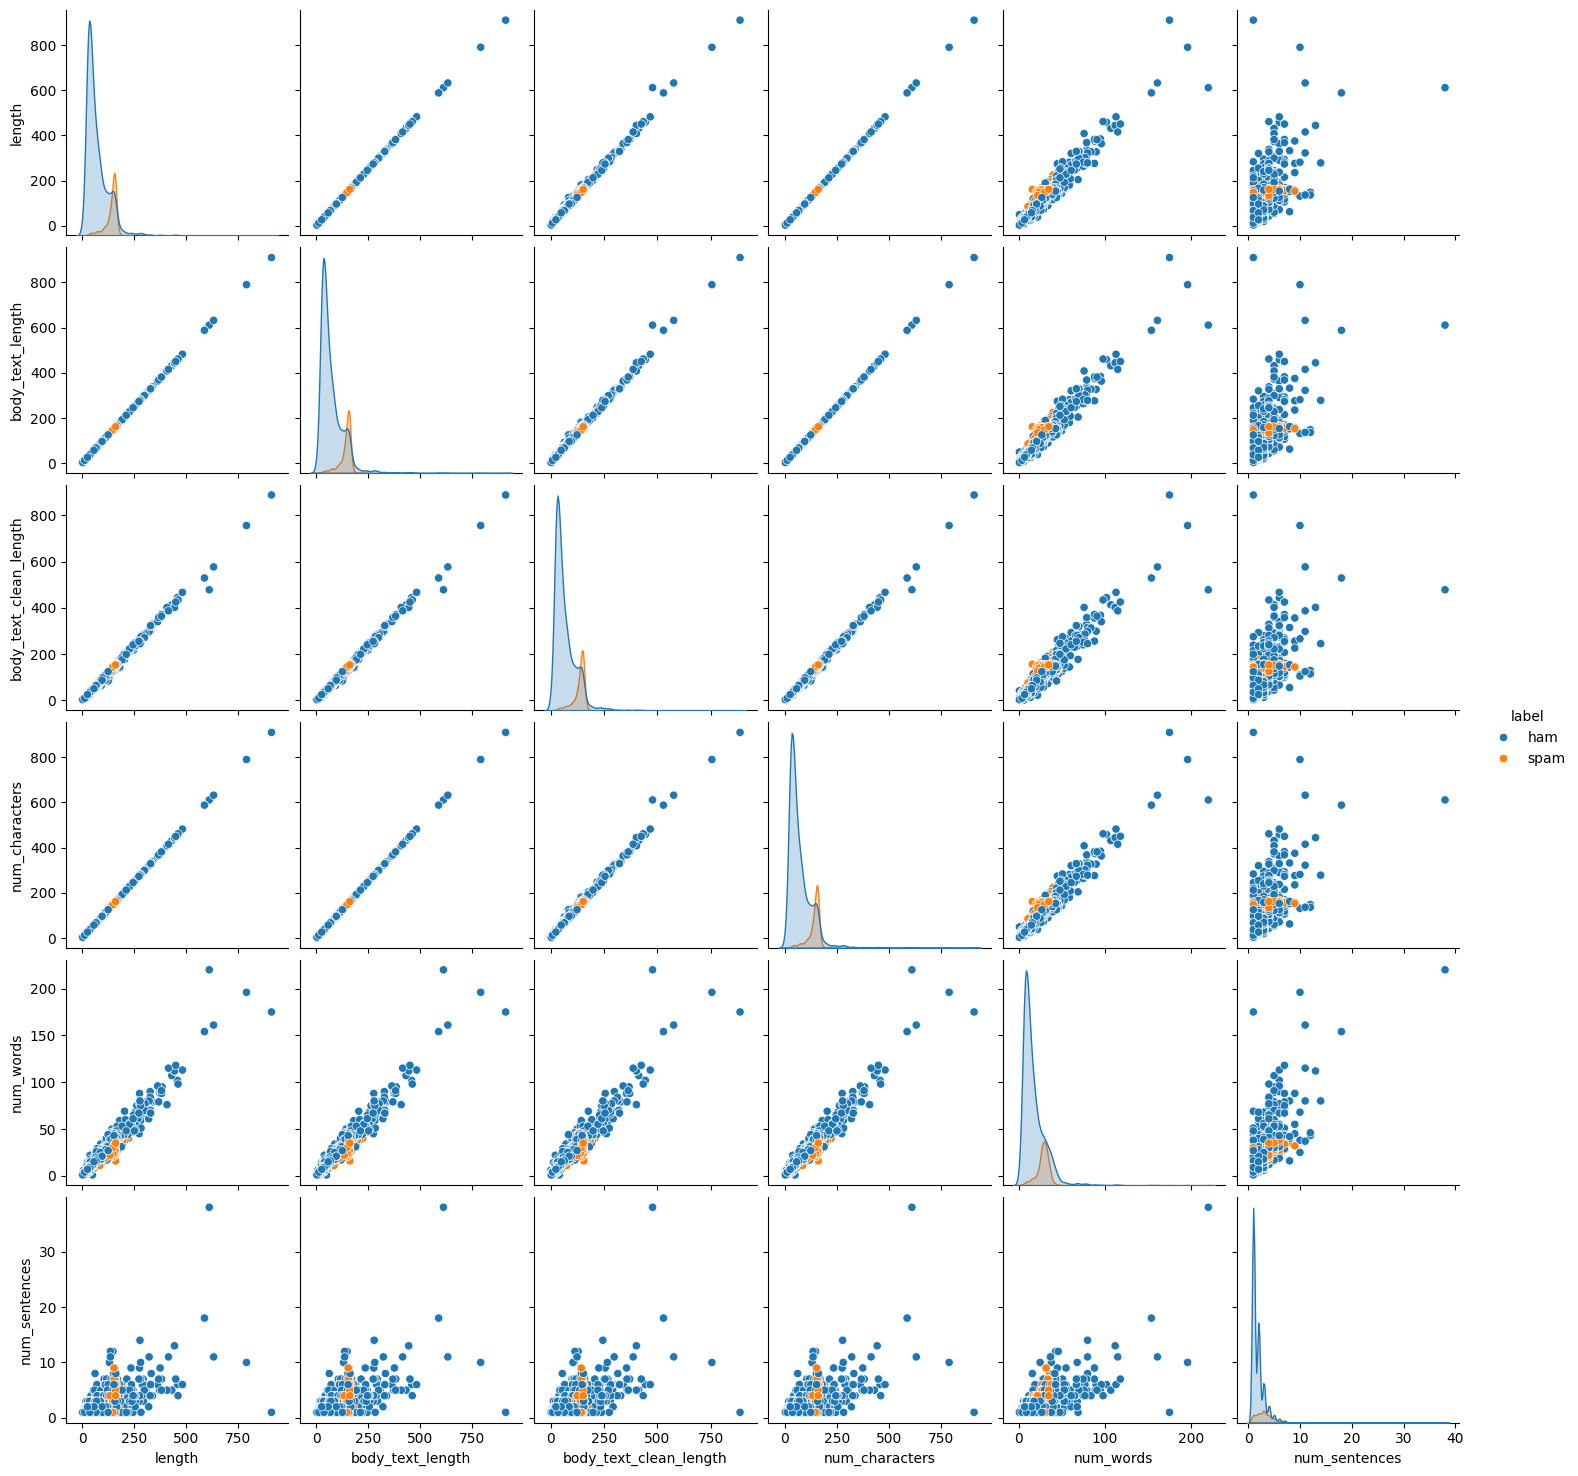

In [21]:
sns.pairplot(mails_,hue='label')

<Axes: >

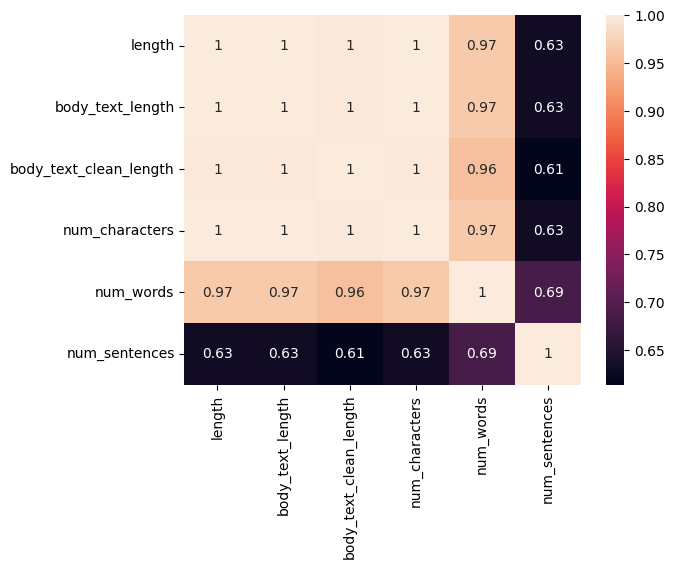

In [22]:
numeric_columns = mails_.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(mails_[numeric_columns].corr(), annot=True)

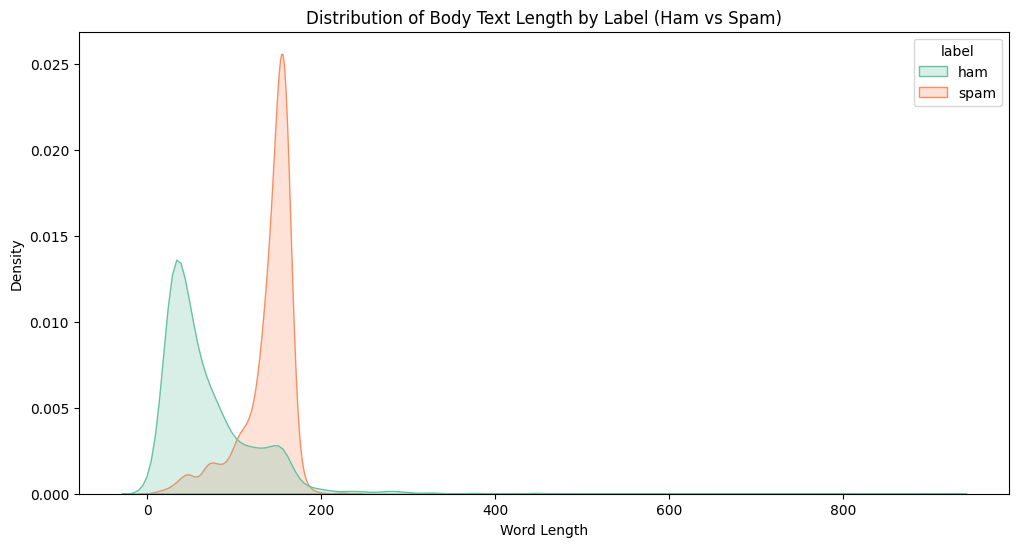

In [23]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=mails_, x='body_text_length', hue='label', fill=True, common_norm=False, palette='Set2')
plt.xlabel('Word Length')
plt.title('Distribution of Body Text Length by Label (Ham vs Spam)')
plt.show()

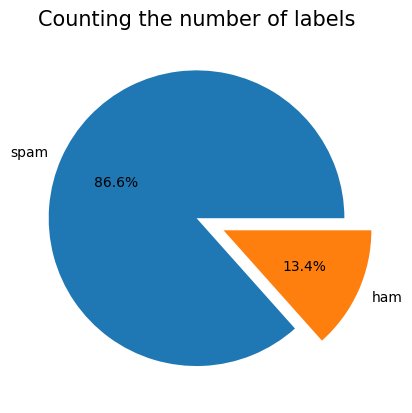

In [24]:
explode = (0, 0.2)
plt.pie(mails_['label'].value_counts(), labels=['spam','ham'],autopct='%1.1f%%', explode=explode)
plt.title("Counting the number of labels",fontsize=15);
plt.show()

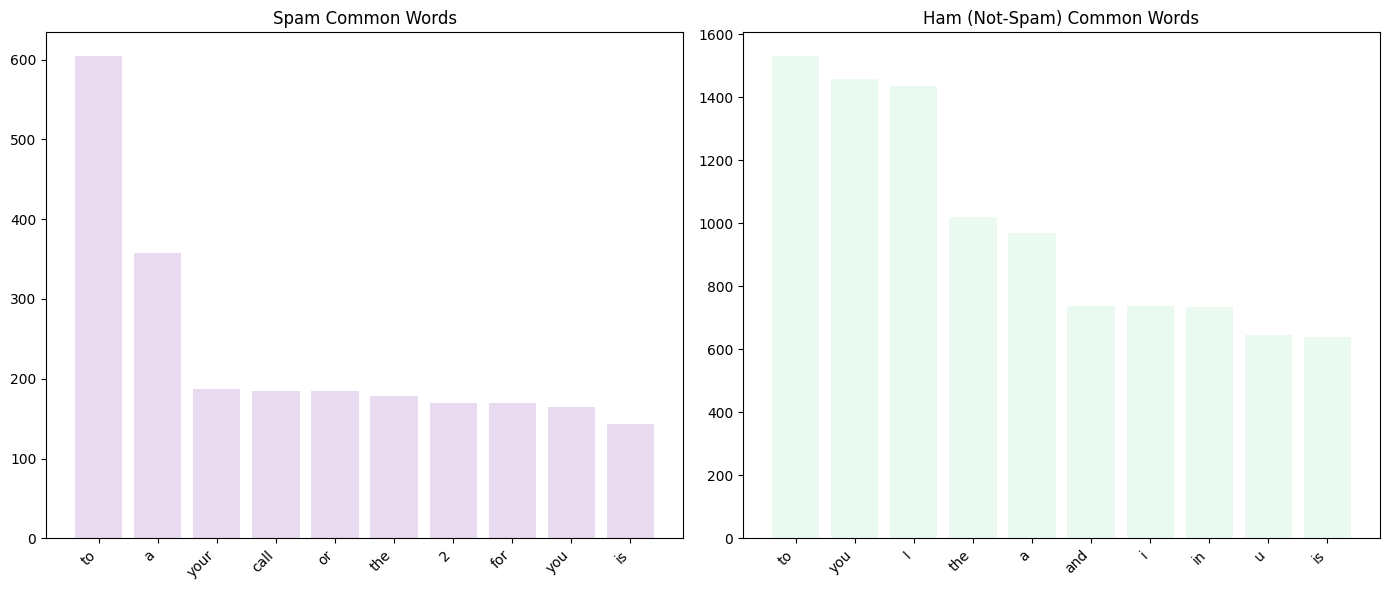

In [25]:
from collections import Counter
# Function to get the most common words and their counts
def get_most_common_words(text, num_words=10):
    words = text.split()
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(num_words)
    return dict(most_common_words)

# Getting sense of loud words in spam
spams = mails_['email'][mails_['label']=='spam'].str.cat(sep=' ')
spam_common_words = get_most_common_words(spams)

# Getting a sense of loud words in ham (not spam)
not_spams = mails_['email'][mails_['label']=='ham'].str.cat(sep=' ')
ham_common_words = get_most_common_words(not_spams)

# Plotting side-by-side bar plots for spam and ham common words
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Spam Word Frequency
axes[0].bar(spam_common_words.keys(), spam_common_words.values(), color='#E8DAEF')
axes[0].set_title('Spam Common Words')
axes[0].set_xticklabels(spam_common_words.keys(), rotation=45, ha='right')

# Ham (Not-Spam) Word Frequency
axes[1].bar(ham_common_words.keys(), ham_common_words.values(), color='#EAFAF1')
axes[1].set_title('Ham (Not-Spam) Common Words')
axes[1].set_xticklabels(ham_common_words.keys(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [26]:
# save clean data set
mails_.to_csv('D:\GitHUb\OIBSIP\Data_Science\𝔼𝕞𝕒𝕚𝕝𝕊𝕡𝕒𝕞ℙ𝕣𝕚𝕕𝕚𝕜𝕚𝕠𝕟\clean\clean_mail.csv', sep=',')

In [27]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.graph_objs as go

class NLPAnalysis:
    def __init__(self, data):
        self.data = data
        self.vocab_size = 10000  # You can adjust this based on your data
        self.word2idx = dict()

    def generate_ngrams(self, text, n_gram=1):
        stopwords = nltk.corpus.stopwords.words('english')
        token = [token for token in text.lower().split(" ") if token != "" if token not in stopwords]
        ngrams = zip(*[token[i:] for i in range(n_gram)])
        return [" ".join(ngram) for ngram in ngrams]

    def horizontal_bar_chart(self, data, color):
        trace = go.Bar(
            y=data["word"].values[::-1],
            x=data["wordcount"].values[::-1],
            showlegend=False,
            orientation='h',
            marker=dict(
                color=color,
            ),
        )
        return trace

    def text_to_vector(self, text):
        word_vector = np.zeros(self.vocab_size)
        for word in text.split(" "):
            if self.word2idx.get(word) is None:
                continue
            else:
                word_vector[self.word2idx.get(word)] += 1
        return np.array(word_vector)

    def convert_to_vectors(self):
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform(self.data['email'])
        return vectors
        
mails_ = pd.read_csv(r'D:\GitHUb\OIBSIP\Data_Science\𝔼𝕞𝕒𝕚𝕝𝕊𝕡𝕒𝕞ℙ𝕣𝕚𝕕𝕚𝕜𝕚𝕠𝕟\clean\clean_mail.csv')
nlp_analysis = NLPAnalysis(data=mails_)
features = nlp_analysis.convert_to_vectors()
print(features.shape)

(5572, 8672)


In [28]:
#Converting words to vector using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(mails_['email'])
vectors.shape
 
#features = word_vectors
features = vectors
features

<5572x8672 sparse matrix of type '<class 'numpy.float64'>'
	with 73916 stored elements in Compressed Sparse Row format>

<!DOCTYPE html>
<html>

<head>
</head>

<body>

  <h2>Machine Learning Models - Overview</h2>

  <h3>1. Naive Bayes:</h3>
  <p>
    Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. It assumes that features are
    independent of each other, given the class label. It is widely used for text classification tasks.
    <a href="https://scikit-learn.org/stable/modules/naive_bayes.html">Learn more about Naive Bayes</a>.
  </p>

  <h3>2. Support Vector Machine (SVM):</h3>
  <p>
    SVM is a powerful supervised machine learning algorithm used for classification and regression tasks. It finds the
    hyperplane that best separates data points into different classes.
    <a href="https://scikit-learn.org/stable/modules/svm.html">Learn more about SVM</a>.
  </p>

  <h3>3. K-Nearest Neighbors (KNN):</h3>
  <p>
    KNN is a simple and effective algorithm for classification and regression tasks. It classifies a data point based on
    the majority class of its k-nearest neighbors.
    <a href="https://scikit-learn.org/stable/modules/neighbors.html#classification">Learn more about KNN</a>.
  </p>

  <h3>4. Random Forest:</h3>
  <p>
    Random Forest is an ensemble learning method that builds multiple decision trees during training and merges them
    together to get a more accurate and stable prediction.
    <a href="https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees">Learn more about Random
      orest</a>.
  </p>

</body>

</html>


In [29]:
# Importing relevant dependencies 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(features, mails_['label'], test_size=0.2, random_state = 150)

In [30]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

clf = MultinomialNB(alpha=0.2)
clf.fit(X_train, Y_train)
y_pred_nb = clf.predict(X_test)

print(classification_report(Y_test, y_pred_nb))
print("Accuracy score: {}".format(round(accuracy_score(Y_test, y_pred_nb), 5)))

NB_accuracy = round(accuracy_score(Y_test, y_pred_nb), 5)

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       950
        spam       0.98      0.94      0.96       165

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Accuracy score: 0.98834


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate the SVM classifier
svm_classifier = SVC(kernel='sigmoid', gamma=1.0)
svm_classifier.fit(X_train, Y_train)

# Make predictions
pred_svm = svm_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, pred_svm)
print(f'Accuracy score for SVM: {accuracy}')

Accuracy score for SVM: 0.9865470852017937


In [32]:
print("Classification Report:")
print(classification_report(Y_test, pred_svm))

accuracy = accuracy_score(Y_test, pred_svm)
print(f"Accuracy Score: {round(accuracy, 5)}")
SVM_accuracy = round(accuracy, 5)

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       950
        spam       0.99      0.92      0.95       165

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Accuracy Score: 0.98655


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings

# Ignore DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Instantiate KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=150, weights='uniform', algorithm='auto', p=1, metric='euclidean', n_jobs=-1)

# Train the classifier
knn_classifier.fit(X_train, Y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred_knn))

# Display accuracy score
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
print(f"Accuracy Score: {round(accuracy_knn, 5)}")
KNN_accuracy = round(accuracy_knn, 5)

Classification Report:
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       950
        spam       1.00      0.49      0.66       165

    accuracy                           0.92      1115
   macro avg       0.96      0.75      0.81      1115
weighted avg       0.93      0.92      0.91      1115

Accuracy Score: 0.92466


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Ignore DeprecationWarning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Instantiate Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=120, max_depth=150, n_jobs=-1)

# Train the classifier
rf_model = rf_classifier.fit(X_train, Y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred_rf))

# Display accuracy score
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print(f"Accuracy Score: {round(accuracy_rf, 5)}")
RnF_accuracy = round(accuracy_rf, 5)

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       950
        spam       1.00      0.88      0.94       165

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy Score: 0.98206


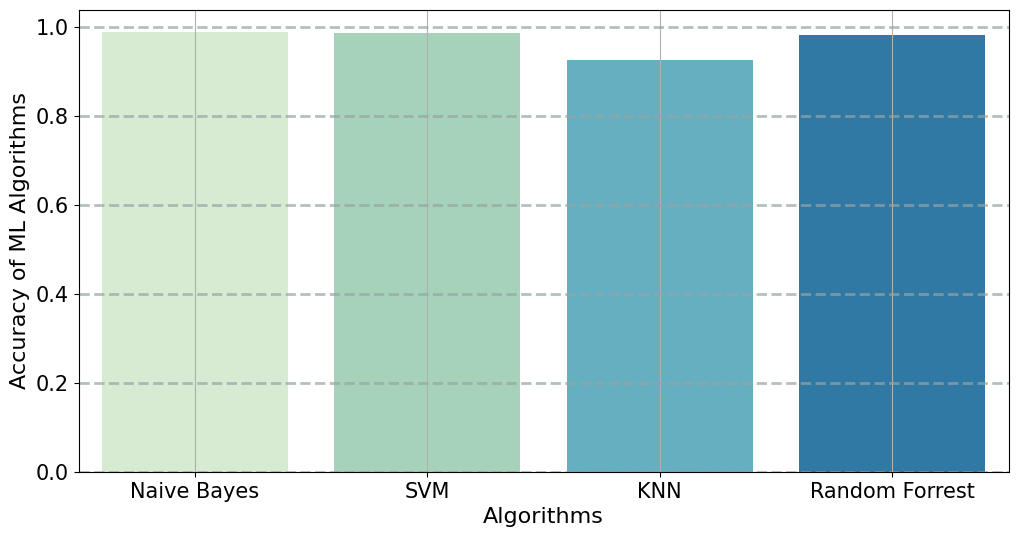

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

algos = ['Naive Bayes', 'SVM', 'KNN', 'Random Forrest']
acc = [NB_accuracy, SVM_accuracy, KNN_accuracy, RnF_accuracy]

plt.figure(figsize=(12, 6))
sns.barplot(x=algos, y=acc, palette='GnBu')
plt.ylabel('Accuracy of ML Algorithms', fontsize=16)
plt.xlabel('Algorithms', fontsize=16)
plt.tick_params(labelsize=15)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.grid(True)
plt.show()

# Internship: Data Science
**Company:** Oasis Infobyte ~ [Oasis Infobyte Website](https://oasisinfobyte.com/)
**Topic:** Email Spam Detection

## Overview
This internship project focused on Email Spam Detection, exploring various aspects of data science and machine learning.

## Challenges Encountered
- <span style="color:red">Graph errors</span>
- <span style="color:red">StringType errors</span>
- <span style="color:red">Missing values</span>
- <span style="color:red">Missing libraries</span>
- <span style="color:red">And So on</span>

## Solutions
- **StackOverflow:** for general problem-solving
- **Geeks for Geeks:** for algorithmic solutions
- **YouTube Code with Harry:** for practical coding examples
- **Library Documentation:** for in-depth understanding and troubleshooting

One notable challenge was downloading files using pip, especially when GitHub raw files were not accessible in India. The solution involved using a VPN and manual installation for certain libraries.

## Source Links
Here are some valuable source links that contributed to problem-solving and project development:
- [Matplotlib Timeline Example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py)
- [Matplotlib setp Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.setp.html)
- [Matplotlib Widgets Gallery](https://matplotlib.org/stable/gallery/widgets/index.html)
- [Matplotlib User Demo Gallery](https://matplotlib.org/stable/gallery/userdemo/index.html)
- [Matplotlib Slider Demo](https://matplotlib.org/stable/gallery/widgets/slider_demo.html#sphx-glr-gallery-widgets-slider-demo-py)
- [ipywidgets Styling Documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Styling.html)
- [Email Spam Detection Tutorial](https://towardsdatascience.com/email-spam-detection-1-2-b0e06a5c0472)
- [Seaborn pairplot Documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- [Pandas DataFrame Documentation](https://pandas.pydata.org/docs/reference/frame.html)
- [Geeks for Geeks Box Plot Tutorial](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/)
- [Matplotlib Pie Chart Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html)
- [Stacked Barchart Issue on Data Science Stack Exchange](https://datascience.stackexchange.com/questions/47287/stacked-barchart-bottom-parameter-triggers-error-shape-mismatch-objects-canno)
- [Converting Scikit-Learn Dataset to Pandas Dataset](https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset)
- [Handling ValueError - Shape Mismatch](https://bobbyhadz.com/blog/value-error-shape-mismatch-objects-cannot-be-broadcast-to-single-shape#)